In [ ]:
%pip install scikit-allel malariagen_data

In [5]:
import pandas as pd
import allel
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import malariagen_data
import matplotlib
import matplotlib.patches as patches

def plotGenes(ax, gff, start=28_524_224, stop=28_573_000, contig='2L', zorder=2, labels=None, label=True):

    gff = gff.query("start > @start & end < @stop and contig == @contig")
    genegff = gff.query("type == 'gene'")
    locgff = gff.query("type == 'exon'")

    min_= locgff.start.min()
    max_ = locgff.end.max()

    max_ = np.max([max_, stop])
    min_ = np.min([min_, start])

    ax.set_xlim(min_, max_)
    ax.set_ylim(-0.5, 2)
    ax.axhline(0.5, color='k', linewidth=3)
    ax.set_yticks(ticks=[0.2,1.2], labels=['- ', '+'], size=20)
    ax.tick_params(top=False,
               left=False,
               right=False,
                bottom=False,
               labelleft=True,
               labelbottom=False)
    ax.tick_params(axis='x', which='major', labelsize=13)
    ax.set_ylabel("Genes")
    ax.set_xlabel(f"Contig {contig} position", fontdict={'fontsize':14})

    for _, exon in locgff.iterrows():
        start, end = exon[['start', 'end']]
        strand = exon['strand']
        if strand == '+':
            rect = patches.Rectangle((start, 0.55), end-start, 0.3, linewidth=3,
                                edgecolor='none', facecolor="grey", alpha=0.9, zorder=zorder)
        else:
            rect = patches.Rectangle((start, 0.45), end-start, -0.3, linewidth=3,
                                edgecolor='none', facecolor="grey", alpha=0.9, zorder=zorder)
        ax.add_patch(rect)

    for _, gene in genegff.iterrows():
        start, end = gene[['start', 'end']]
        size = end-start
        corr = size/2
        corr2 = size/4
        strand = gene['strand']

        if labels:
            ID = labels[gene['ID']]
        else:
            ID = gene['ID']

        if strand == '+':
            rect = patches.Rectangle((start, 0.55), end-start, 0.3, linewidth=3,
                                edgecolor='black', facecolor="none", zorder=zorder)
            if label: ax.text(((start+end)/2)-corr2, 0.95, s=ID, fontdict= {'fontsize':12}, rotation=20)
        else:
            rect = patches.Rectangle((start, 0.45), end-start, -0.28, linewidth=3,
                                edgecolor='black', facecolor="none", zorder=zorder)
            if label: ax.text(((start+end)/2)-corr,  -0.3, s=ID, fontdict= {'fontsize':12})
        ax.add_patch(rect)

### Locus in detail in Ag and Cx.pipiens

In [6]:
labels = {f"AGAP0062{i}":f"AGAP0062{i}"  for i in np.arange(22,36)}

newlabels = {'AGAP006222':'UGT222',
            'AGAP006226': 'AldehydeOxidase226',
            'AGAP006227': 'Coeae1f',
            'AGAP006228': 'Coeae2f'}

labels.update(newlabels)

In [7]:
ag3 = malariagen_data.Ag3()
ag3_gff = ag3.genome_features()

In [ ]:
cx_gff = allel.gff3_to_dataframe("../../VectorBase-65_CquinquefasciatusJHB2020.gff",
                                 attributes=['Parent', 'ID']).rename(columns={'seqid':'contig'}).replace("protein_coding_gene", "gene")
cx_gff = cx_gff.sort_values(by=['contig','start'])

In [ ]:
ratio = (cx_2020_stop - cx_2020_start)/ag_size

In [ ]:
rm_genes = ['AGAP006224']#, 'AGAP006232', 'AGAP006233', 'AGAP006234', 'AGAP006235', 'AGAP006236', 'AGAP006237', 'AGAP006237', 'AGAP006238', 'AGAP006239']

In [ ]:
ag3_gff3 = ag3_gff[~ag3_gff.Parent.fillna("blahblah").str.contains('|'.join(rm_genes))]
ag3_gff3 = ag3_gff3[~ag3_gff.ID.fillna("blahblah").str.contains('|'.join(rm_genes))]

/tmp/ipykernel_15866/2006064298.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ag3_gff3 = ag3_gff3[~ag3_gff.ID.fillna("blahblah").str.contains('|'.join(rm_genes))]


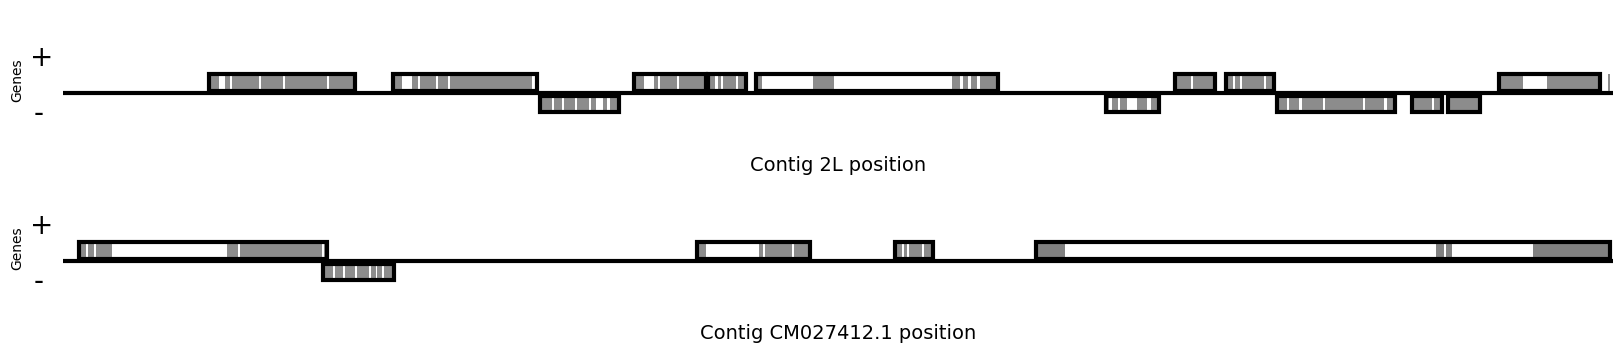

In [ ]:
fig, ax = plt.subplots(2,1, figsize=[20, 4])#, gridspec_kw={'width_ratios':[1, ratio]})

ag_start = 28530000
ag_stop = ag_start + 50000
ag_size = ag_stop-ag_start

cx_2020_contig = 'CM027412.1'
cx_2020_start = 137353000
cx_2020_stop = cx_2020_start + 50000

plotGenes(ax=ax[0], gff=ag3_gff3, contig='2L', start=ag_start, stop=ag_stop, label=False)
plotGenes(ax=ax[1], gff=cx_gff, contig=cx_2020_contig, start=cx_2020_start, stop=cx_2020_stop, label=False)
for axes in ax:
    sns.despine(ax=axes, left=True, bottom=True)

#plt.savefig("../../figures/locus_orthology_base.svg", dpi=300)

- AGAP006226/5002 - 62.99%
- 227/812 - 68.83%
- 228-176 - 63.65%
- 229-469 - 79.91%
- 231/949 - 95.10%

### CNV plot

In [ ]:
moshi_dup_start, moshi_dup_end = 28535653, 28571586
gaard_dup_start, gaard_dup_end = 28542695, 28551033

gamb_cnv_breakpoints = [gaard_dup_start, gaard_dup_end] # baguida and obuasi CNV
moshi_cnv_breakpoints = [moshi_dup_start, moshi_dup_end]

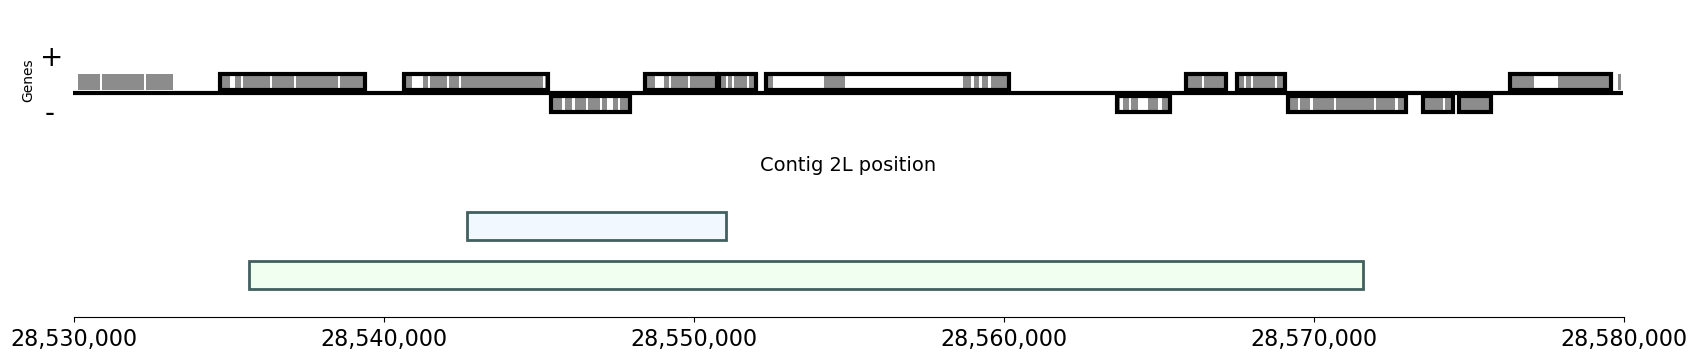

In [ ]:
fig, ax = plt.subplots(2,1, figsize=[20, 4], sharex=True)#, gridspec_kw={'width_ratios':[1, ratio]})

plotGenes(ax=ax[0], gff=ag3_gff, contig='2L', start=28_530_000, stop=28_580_000, label=False)
for axes in ax:
    sns.despine(ax=axes, left=True, bottom=True)

rect = patches.Rectangle((gaard_dup_start, 0.55), gaard_dup_end-gaard_dup_start, 0.2, linewidth=2,
                        edgecolor='darkslategrey', facecolor="aliceblue", alpha=0.9, zorder=1)
ax[1].add_patch(rect)

rect = patches.Rectangle((moshi_dup_start, 0.20), moshi_dup_end-moshi_dup_start, 0.2, linewidth=2,
                        edgecolor='darkslategrey', facecolor="honeydew", alpha=0.9, zorder=1)
ax[1].add_patch(rect)
ax[1].set_yticks([])
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=16)
ax[1].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
sns.despine(ax=ax[1], left=True, bottom=False)

### Sequence similarity

In [ ]:
import gget
gget.seq(ens_ids="AGAP006232-RA", translate=True)

In [ ]:
blast231 = gget.blast(sequence='MPMLSHFQMNFRVFLVLASKLWTCICFMFKRQVRAFVQHQPVRYQLFPLSPVSRHRLSMVQRKTLVLDLDETLIHSHHDAMPRNTVKPGTPHDFTVKVTIDRHPVRFFVHKRPHVDYFLDIVSQWYDLVVFTASMEIYGAAVADKLDNGRNILRRRYYRQHCTPDFGSYTKDLSAICSDLNRIFIIDNSPGAYRCFPNNAIPIKSWFSDPMDICLLSLLPLLDALRFTNDVRSVLSRNLHLHRLW', database='refseq_protein', program='blastp')

Tue Sep 26 22:01:25 2023 INFO BLAST initiated with search ID H6AM4BTG016. Estimated time to completion: 28 seconds.
Tue Sep 26 22:01:55 2023 INFO BLASTING...


URLError: <urlopen error [Errno -2] Name or service not known>

In [ ]:
transcripts_ag = ag3_gff.query("type == 'mRNA' and contig == '2L' and start > @ag_start and end < @ag_stop").ID.to_list()

In [ ]:
tblast = {}
for t in transcripts_ag:
    try:
        pseq = gget.seq(ens_ids=t, translate=True)
        tblast[t] = gget.blast(sequence=pseq[1], database='refseq_protein', program='blastp')
    except TypeError:
        tblast[t] = "null"

Wed Sep 27 09:41:49 2023 INFO Requesting amino acid sequence of AGAP006225-RA from UniProt.
Wed Sep 27 09:41:52 2023 WARNING No reviewed UniProt results were found for ID AGAP006225-RA. Returning all unreviewed results.


KeyboardInterrupt: 

In [ ]:
for k,v in tblast.items():
    if isinstance(v, str):
        continue
    v.to_csv(f"{k}.tsv", sep="\t")

## Diamond

In [ ]:
# run against aedes
!diamond blastp -d resources/aael_reference -q resources/alpha_esterase228/Anopheles_gambiae_COEAE2F_sequence.fa -o results/orthology/AGAP006228_aael.tsv
!diamond blastp -d resources/aael_reference -q resources/alpha_esterase227/Anopheles_gambiae_COEAE1F_sequence.fa -o results/orthology/AGAP006227_aael.tsv
# run against culex
!diamond blastp -d resources/cpip_reference -q resources/alpha_esterase227/Anopheles_gambiae_COEAE1F_sequence.fa -o results/orthology/AGAP006227_aael.tsv
!diamond blastp -d resources/cpip_reference -q resources/alpha_esterase228/Anopheles_gambiae_COEAE2F_sequence.fa -o results/orthology/AGAP006228_aael.tsv